In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

In [3]:
data = pd.read_csv("../notebooks/datasets/marketing_campaign.csv").dropna()
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming your dataset is loaded into a DataFrame named 'df'
# Replace 'df' with your actual DataFrame

# Select relevant attributes for clustering
cluster_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Prepare data for clustering
X = data[cluster_features].copy()

# Scale the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit K-means clustering to the scaled data
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Analyze cluster characteristics (e.g., centroids, mean values)
cluster_summary = data.groupby('Cluster')[cluster_features].mean()

# Assign cluster labels based on characteristics
cluster_labels = {}


for cluster_id in range(len(cluster_summary)):
    cluster_values = cluster_summary.loc[cluster_id].values
    
    # Define conditions based on cluster characteristics to assign labels
    if cluster_values[0] > cluster_summary['MntWines'].mean():
        label = 'Wine Enthusiasts'
    elif cluster_values[1] > cluster_summary['MntFruits'].mean() and cluster_values[2] > cluster_summary['MntMeatProducts'].mean():
        label = 'Family Shoppers'
    elif cluster_values[3] > cluster_summary['MntFishProducts'].mean():
        label = 'Seafood Lovers'
    elif cluster_values[5] > cluster_summary['MntGoldProds'].mean():
        label = 'Premium Product Consumers'
    else:
        label = 'General Buyers'
    
    cluster_labels[cluster_id] = label

# Map cluster labels to the original DataFrame
data['Cluster_Label'] = data['Cluster'].map(cluster_labels)




In [10]:
# Display cluster labels and characteristics

cluster_labels

# print(cluster_summary)

# # Explore cluster sizes
# cluster_sizes = data['Cluster_Label'].value_counts()
# print(cluster_sizes)

{0: 'General Buyers',
 1: 'General Buyers',
 2: 'Wine Enthusiasts',
 3: 'Wine Enthusiasts',
 4: 'Wine Enthusiasts'}

In [3]:
X = data.iloc[:, 1:-1].values
Y = data.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import LabelEncoder
yLabelEncoder = LabelEncoder()
Y = yLabelEncoder.fit_transform(Y)

In [5]:
Y

array([5, 5, 5, ..., 3, 3, 3])

In [6]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size=0.8, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
xScale = StandardScaler()
xScale.fit(X)
xTrain = xScale.transform(xTrain)
xTest = xScale.transform(xTest)

Classifier

In [8]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [9]:
baseClassifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('hgbc', HistGradientBoostingClassifier(random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
]

In [10]:
staxifier = StackingClassifier(
    estimators = baseClassifiers,
    final_estimator = LogisticRegression(max_iter=1000),
    stack_method = 'auto',
    n_jobs = -1,
    verbose=1,
    passthrough=True
)

staxifier.fit(xTrain, yTrain)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('et', ExtraTreesClassifier(random_state=42)),
                               ('ada',
                                AdaBoostClassifier(n_estimators=100,
                                                   random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('hgbc',
                                HistGradientBoostingClassifier(random_state=42)),
                               ('svm',
                                SVC(kernel='linear', probability=True,
                                    random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('mlp',
                                MLPClassifier(max_iter=1000, random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
                   verbose=1)

In [11]:
predictions = staxifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
presicion = precision_score(yTest, predictions, average='macro')
recall = recall_score(yTest, predictions, average='macro')
f1Score = f1_score(yTest, predictions, average='macro')
confusionMatrix = confusion_matrix(yTest, predictions)

print("Metric Scores")
print("Accuracy: " + str(accuracy*100))
print("Precision: " + str(presicion*100))
print("Recall: " + str(recall*100))
print("f1 Score: " + str(f1Score*100))

Metric Scores
Accuracy: 93.38964377524789
Precision: 94.61201381102252
Recall: 94.3195211791382
f1 Score: 94.45967116644367


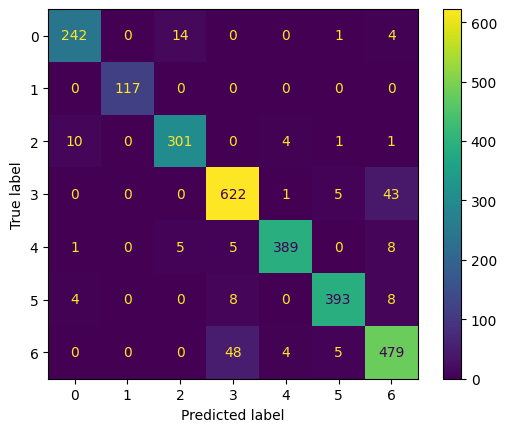

In [12]:
confusionMatrix = confusion_matrix(yTest, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)
disp.plot()
plt.show()